# COMP5014 - Artificial Intelligence and Machine Learning
## Assignment 1
## Sachin Ganpat - 68300
## 2019-04-14


In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Import the dataset
dataset = pd.read_csv('turnout.csv')

# Extract values
X = dataset.iloc[:, [4, 3, 2]].values
voted = dataset.iloc[:, [5]].values
voted = voted[:,0] #probably a better ways to do this. Change to array.
race = dataset.iloc[:, [1]].values
race = race[:,0]


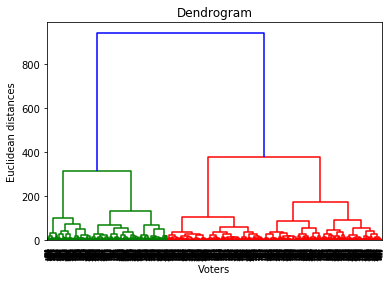

In [3]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Voters')
plt.ylabel('Euclidean distances')
plt.show()

In [4]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Text(0.5, 1.0, 'Race Comparison')

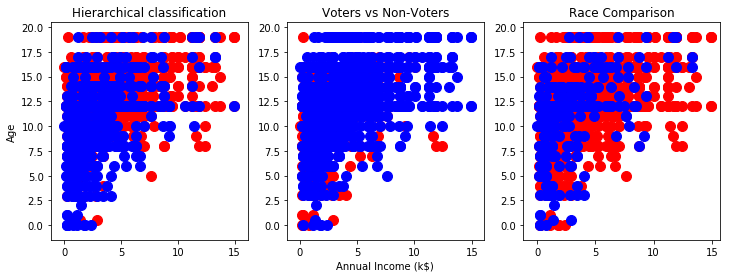

In [5]:
# Visualising the clusters
plt.rcParams['figure.figsize'] = 12, 4

# Plot of classification
plt.subplot(1,3,1)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Hierarchical classification')
plt.ylabel('Age')

# Plot of values compares to people who voted
plt.subplot(1,3,2)
plt.scatter(X[voted == 0, 0], X[voted == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[voted == 1, 0], X[voted == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Voters vs Non-Voters')
plt.xlabel('Annual Income (k$)')

plt.subplot(1,3,3)
plt.scatter(X[race == 'white', 0], X[race == 'white', 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[race != 'white', 0], X[race != 'white', 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Race Comparison')
